# 🏦 Predição de Default de Cartão de Crédito com Rede Neural

## 📌 Sobre o Dataset de Default de Cartão de Crédito
O **dataset de default de cartão de crédito** contém informações sobre clientes de cartão de crédito e se eles efetuaram ou não o pagamento do saldo mínimo no mês seguinte. O objetivo é usar essas características para prever se um cliente irá **default** (não pagar) ou não.

As características incluem:  
- 👤 **Idade**  
- 💳 **Limite de crédito**  
- 💰 **Montante das faturas**  
- 🔄 **Histórico de pagamento** (6 meses anteriores)  
- 📊 **Sexo**, **Educação**, **Estado civil**  
E muitas outras variáveis que ajudam a classificar o comportamento de pagamento dos clientes.

---

## 🚀 O que o código faz?
Este código implementa um modelo **Rede Neural Multicamadas (MLPClassifier)** para prever se um cliente irá **default** (não pagar) ou **não default** (pagar).

🔹 **Carrega o dataset de clientes de cartão de crédito**  
🔹 **Divide os dados em treino e teste** (80/20)  
🔹 **Otimiza hiperparâmetros utilizando GridSearchCV**  
🔹 **Treina uma Rede Neural Multicamadas (MLPClassifier)**  
🔹 **Avalia o modelo** com métricas como:  
    - Acurácia  
    - Relatório de classificação  
    - Matriz de confusão  
    - Curva ROC

---

## 🛠️ Como funciona o código?
O código está estruturado com funções para facilitar a compreensão:

1️⃣ **`carregar_dataset()`** → Carrega e exibe as primeiras linhas do dataset  
2️⃣ **`dividir_dados()`** → Divide os dados em treino e teste  
3️⃣ **`pré_processar()`** → Realiza o pré-processamento dos dados (normalização e codificação)  
4️⃣ **`treinar_modelo()`** → Treina o modelo de Rede Neural Multicamadas com otimização de hiperparâmetros  
5️⃣ **`avaliar_modelo()`** → Avalia o modelo utilizando métricas como acurácia, classificação e curva ROC

---

## 📊 Avaliação do Modelo
Após o treinamento, o código exibe:

✔ **Relatório de Classificação** (Precisa, Recall, F1-Score)  
✔ **Matriz de Confusão** com a visualização de acertos e erros do modelo  
✔ **Curva ROC** para análise da taxa de falsos positivos vs. taxa de verdadeiros positivos  

📌 *Matriz de Confusão Gerada:*  
🔵 Azul = Classificações corretas  
⚪ Branco = Erros do modelo  

📌 *Curva ROC:*  
A Curva ROC ajuda a visualizar a performance do modelo, mostrando a **Taxa de Falsos Positivos** e **Taxa de Verdadeiros Positivos**.

---

## 🔧 Requisitos
Antes de rodar o código, instale as dependências necessárias:

```bash
pip install pandas numpy matplotlib seaborn scikit-learn


Primeiras linhas do dataset:
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default_payment  
0     

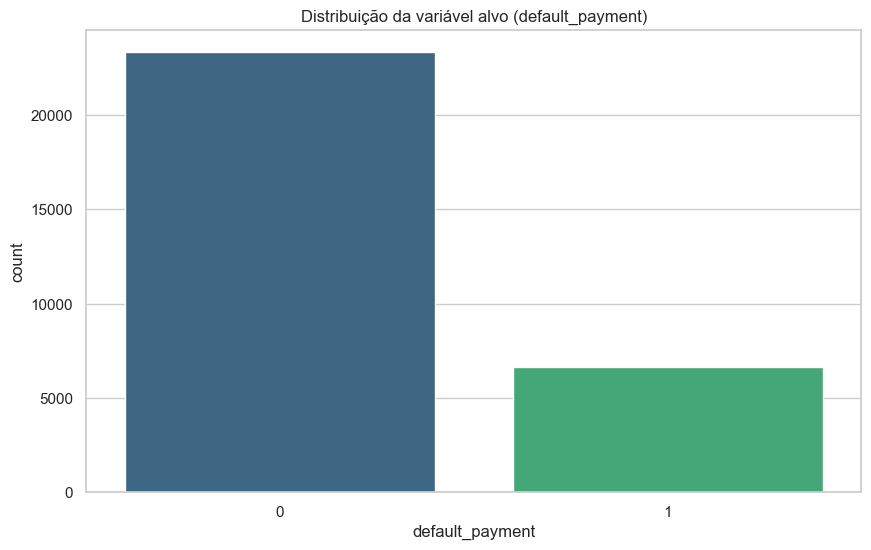

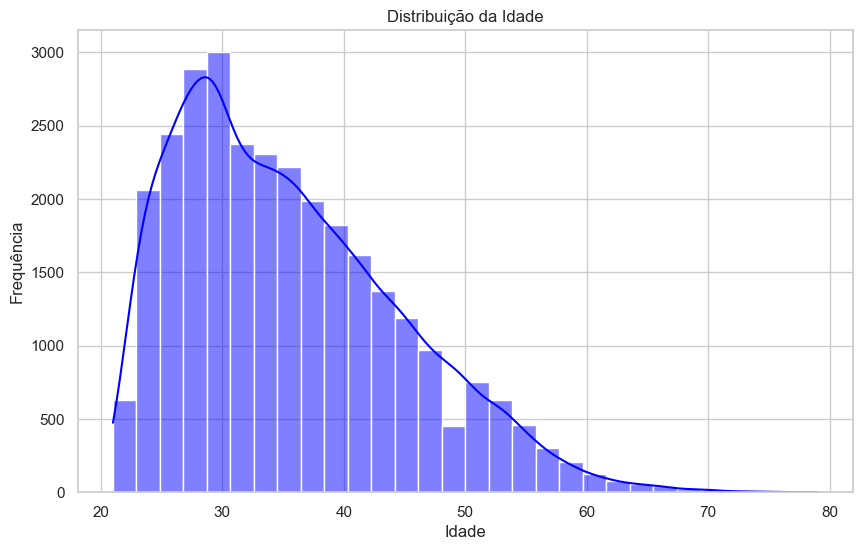

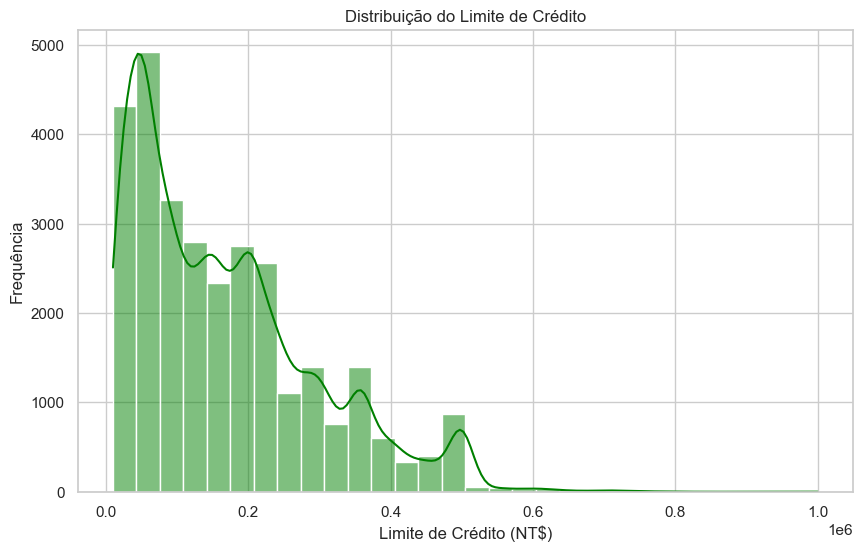


Colunas de X: Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')
Faltando colunas categóricas: ['PAY_1']

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.66      0.35      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000



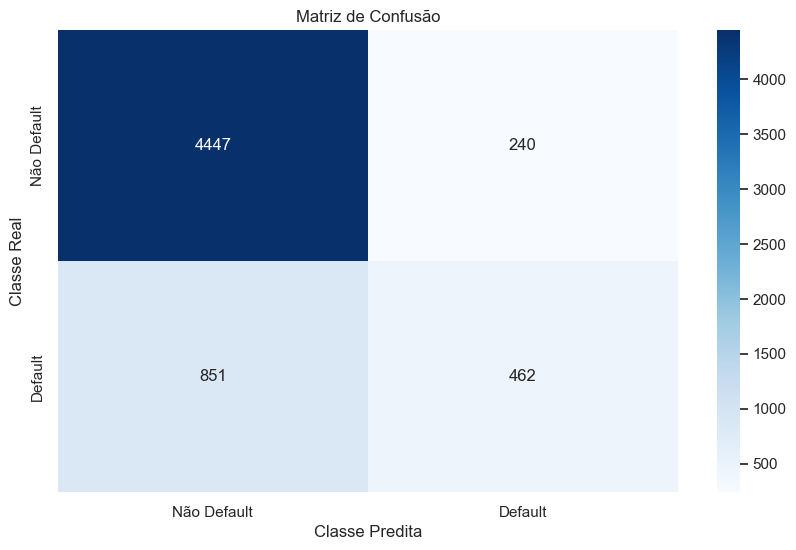

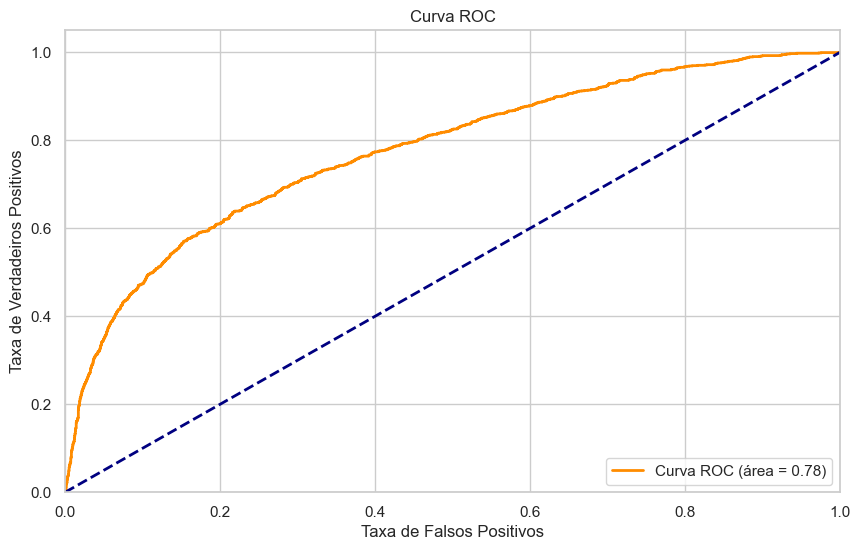

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

# Configurações iniciais
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Carregamento e inspeção dos dados
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url, header=1)

# Renomear a coluna alvo para 'default_payment'
df.rename(columns={'default payment next month': 'default_payment'}, inplace=True)

# Exibir as primeiras linhas do dataframe
print("Primeiras linhas do dataset:")
print(df.head())

# Informações gerais sobre o dataframe
print("\nInformações gerais do dataset:")
print(df.info())

# Verificar a presença de valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# 2. Análise exploratória de dados (EDA)

# Distribuição da variável alvo
plt.figure()
sns.countplot(x='default_payment', data=df, palette='viridis')
plt.title('Distribuição da variável alvo (default_payment)')
plt.show()

# Distribuição da idade
plt.figure()
sns.histplot(df['AGE'], bins=30, kde=True, color='blue')
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Distribuição do limite de crédito
plt.figure()
sns.histplot(df['LIMIT_BAL'], bins=30, kde=True, color='green')
plt.title('Distribuição do Limite de Crédito')
plt.xlabel('Limite de Crédito (NT$)')
plt.ylabel('Frequência')
plt.show()

# 3. Pré-processamento dos dados

# Seleção das variáveis independentes e dependente
X = df.drop(columns=['ID', 'default_payment'])
y = df['default_payment']

# Verifique as colunas de X para garantir que todas as variáveis existem
print("\nColunas de X:", X.columns)

# Identificação de variáveis numéricas e categóricas
numeric_features = ['LIMIT_BAL', 'AGE'] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE'] + [f'PAY_{i}' for i in range(0, 7)]

# Verificar se todas as colunas numéricas e categóricas estão presentes
missing_numeric_cols = [col for col in numeric_features if col not in X.columns]
missing_categorical_cols = [col for col in categorical_features if col not in X.columns]

if missing_numeric_cols:
    print(f"Faltando colunas numéricas: {missing_numeric_cols}")
if missing_categorical_cols:
    print(f"Faltando colunas categóricas: {missing_categorical_cols}")

# Ajuste caso alguma coluna esteja faltando (exemplo, removendo as que não existem)
numeric_features = [col for col in numeric_features if col in X.columns]
categorical_features = [col for col in categorical_features if col in X.columns]

# Criação do pré-processador
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
                  ('cat', categorical_transformer, categorical_features)])

# 4. Construção e treinamento do modelo

# Criação do pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', MLPClassifier(max_iter=300, random_state=42))])

# Definição dos hiperparâmetros para otimização
param_grid = {
    'classifier__hidden_layer_sizes': [(50, 50), (100,)],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__solver': ['sgd', 'adam'],
    'classifier__alpha': [0.0001, 0.05],
    'classifier__learning_rate': ['constant', 'adaptive'],
}

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Otimização de hiperparâmetros com GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, n_jobs=-1, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_

# 5. Avaliação do modelo

# Previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Default', 'Default'], yticklabels=['Não Default', 'Default'])
plt.title('Matriz de Confusão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.show()

# Curva ROC
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
